# Exploring Relationships Between Variables Foodborne Dataset

### 1. Importing Libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
# Defining path
path = r'C:\Users\marig\OneDrive\Área de Trabalho\curso arbeitsamt\data immersion\achievement 6\data sources\final project\Data'

In [4]:
# Loading Dataset
food_df_1 = pd.read_csv (os.path.join (path, 'Prepared Data', 'food_safety_cdc_2.csv'), index_col = 0)

In [5]:
%matplotlib inline

### 2. Defining variables suitable for visual analysis

In [6]:
food_df_1.head()

,Year,Month,State,Primary Mode,Etiology,Serotype or Genotype,Etiology Status,Setting,Illnesses,Hospitalizations,Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category
0,2011,1,Ohio,Food,NaN,NaN,NaN,Restaurant - Sit-down dining,2,0.0,0.0,pie,NaN,Multiple
1,2011,1,Ohio,Food,Norovirus Genogroup II,GII.4 New Orleans,Suspected,Restaurant - Sit-down dining,2,0.0,0.0,NaN,NaN,NaN
2,2011,1,Virginia,Food,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,7,0.0,0.0,NaN,NaN,NaN
3,2011,1,Texas,Food,NaN,NaN,NaN,NaN,2,0.0,0.0,NaN,NaN,NaN
4,2011,1,Colorado,Food,Norovirus unknown,NaN,Confirmed,Grocery store,8,1.0,0.0,mixed fruit,NaN,Fruits


In [7]:
# The following variables are suitable for visual analysis:  illnesses, hospitalizations and deaths.

### 3. Exploring relationships

#### 3.1 Correlation

In [8]:
#Excluding the columns year and month for the porpuse of this task.

In [9]:
food_df_2 = food_df_1.drop (['Year', 'Month'], axis = 1)

In [10]:
food_df_2.corr()

C:\Users\marig\AppData\Local\Temp\ipykernel_13724\4189259012.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  food_df_2.corr()


,Illnesses,Hospitalizations,Deaths
Illnesses,1.000000,0.611511,0.096411
Hospitalizations,0.611511,1.000000,0.366271
Deaths,0.096411,0.366271,1.000000


##### 3.1.1 Creating a heatmap with seaborn

C:\Users\marig\AppData\Local\Temp\ipykernel_13724\4016709103.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap (food_df_2.corr(), annot = True, ax = ax)


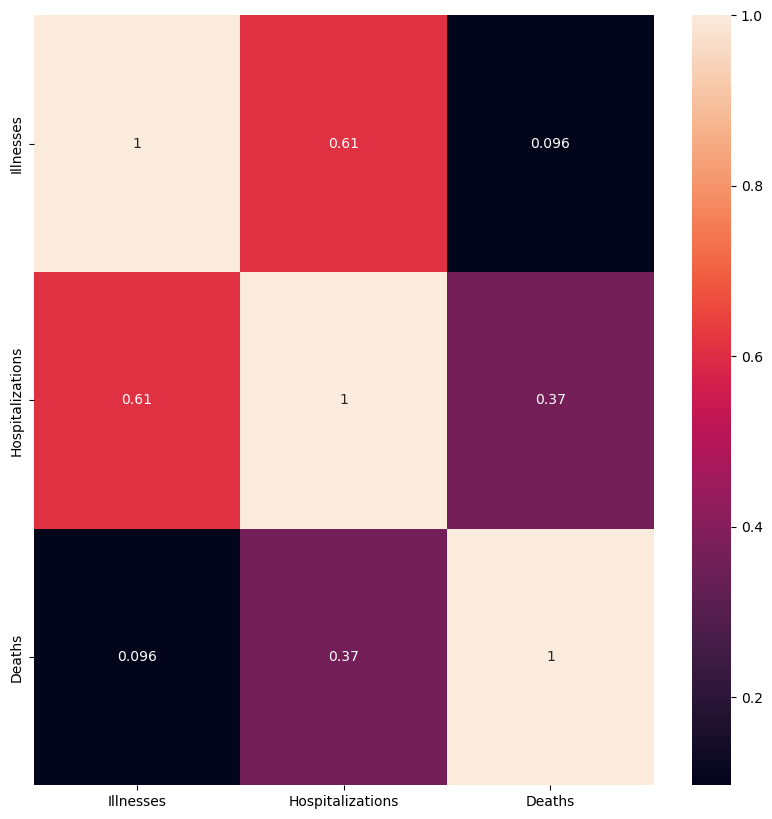

In [11]:
# Creating a subplot with matplotlib
f,ax = plt.subplots (figsize = (10,10))
# Creating the correlation map with seaborn 
corr = sns.heatmap (food_df_2.corr(), annot = True, ax = ax)

The coeficient mean that there are correlations between the variables Deaths, Hospitalizations and Illnesses. 
The correlation between illness and hospitalizations is positive and strong (0.61, near to 1)
The correlation between illness and deaths is also positive but week (0.096)
The correlation between deaths and hospitalizations is positive and middle (0.37)
With the map it is possible to say that there is an strong correlation between getting sick (illness) because of the foodborne pathogens l
and being hospitalized. This is a very important information because it can shows that normally getting a foodborne pathogen can lead
to hospitalization, but the good point is that getiing sick not necessarily leads to death (weak correlation).
At the same time, probablly being hospitalized increase the chance of death.

#### 3.1.2 Scatterplot from the strongest correlation

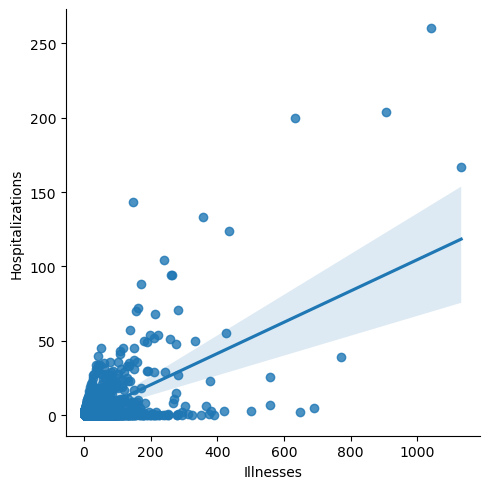

In [12]:
# Scatterplot for "illnesses" and "hospitalized" columns in seaborn

sns.lmplot(x = 'Illnesses', y = 'Hospitalizations', data = food_df_2)

The graphic shows a positive correlation between the variables, a middle to strong relationship (the points are nearby each other, but a bit fair away from the trend line), the most part of the points are concentrated between 0 and 50  hospitalizations and 0 and 200 illnesses, there are also some outliers. If we could have a greater sample with more values, it would be easier to see if this is a linear correlation or not. 


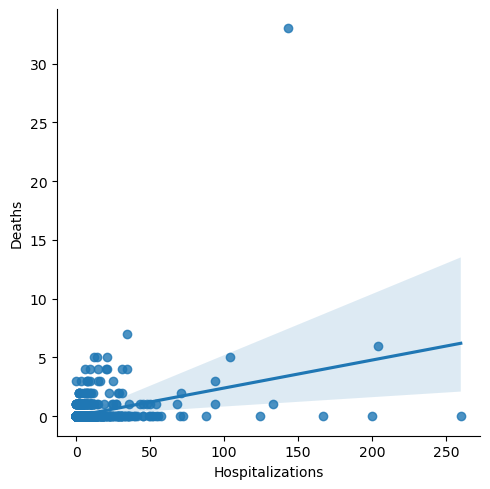

In [13]:
# Scatterplot for "hospitalized" and "deaths" columns in seaborn
sns.lmplot(x = 'Hospitalizations', y = 'Deaths', data = food_df_2)

This graphic shows also a positive correlation, but a I think this is not a linear relationships. The most part of the points are concentrated between 0 to 5 deaths, and 0 to 50 hospitalizations. That will be possible nearby the mean of deaths and hospitalizations. With a greater sample it would be easier to see the relation patterns.

#### 3.1.3 Pair plot of the entire dataset

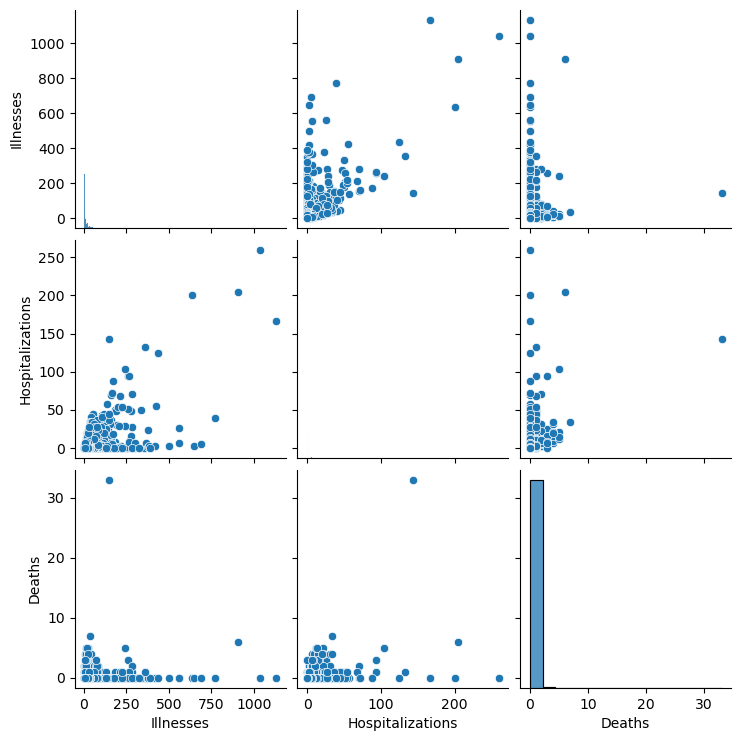

In [14]:
g = sns.pairplot (food_df_2)

I would like to explore more the relation between Illness x Hospitalizations, because for the column Deaths, there are too much null values, then the correlations will not be relevant.
I also can use the the results from the correlation Illness x Hospitalizations to associate with the pathogens that cause more illness and consequently hospitalizations as well as with the kind of food responsable for the outbreak and the settling place.
This associations can bring precious information about the behaviour of the outbreaks.

#### 3.1.4 Categorical Plott

<Axes: xlabel='Illnesses', ylabel='Count'>

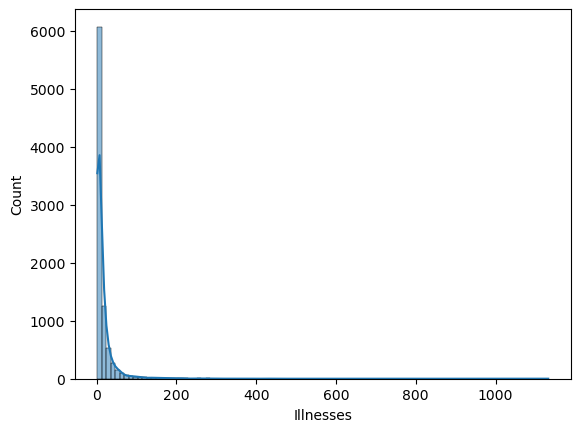

In [15]:
sns.histplot(food_df_2['Illnesses'], bins = 100, kde = True)

In [16]:
food_df_2.loc[food_df_2['Illnesses'] < 50, 'Outbreak Extension'] = 'Low extension'


In [17]:
food_df_2.loc[(food_df_2['Illnesses'] >= 50) & (food_df_2['Illnesses'] < 150), 'Outbreak Extension'] = 'Middle extension'

In [18]:
food_df_2.loc[food_df_2['Illnesses'] >= 150, 'Outbreak Extension'] = 'High extension'

In [19]:
food_df_2['Outbreak Extension'].value_counts(dropna = False)

Low extension       8160
Middle extension     443
High extension       100
Name: Outbreak Extension, dtype: int64

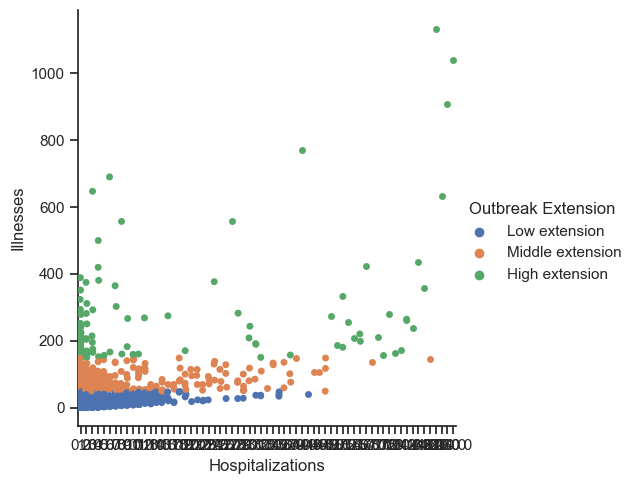

In [20]:
# Create a categorical plot in seaborn using the price categories created above
sns.set(style="ticks")
g = sns.catplot(x="Hospitalizations", y="Illnesses", hue="Outbreak Extension", data=food_df_2)

It is a difficult to interpret this graphic because of the bad configuration of the graphic for the Hospitalization value.
But, it is possible to see with the categories, that high extension outbreaks (green) are associated with a higher number of hospitalizations.

### Question 7 Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

Only with the graphics and the correlations presented here it is not possible to answer my previous questions. But, these analysis here will help to make associations with qualitative values that I have in this Dataset.
For example: I have a colum with each pathogen that was responsable for each outbreak. I can group the illness, hospitalizations and deaths by pathogen, to see which one had the worst mortality index or which one was the most prevalent. At the same time with the correlation results from this task, it is possible to say if a pathogen caused a huge number of illnesses it will also cause a huge number of hospitalizations and probably will be most dangerous.

Other possibility would be grouping the results by settling or primary mode of transmission.



### Question 8.Define any hypotheses that you can at this point. You’ll be testing these later on.

The pathogens that cause a higher number of illnesses will also cause the greatest number of deaths.



In [22]:
food_df_2.columns

Index(['State', 'Primary Mode', 'Etiology', 'Serotype or Genotype',
       'Etiology Status', 'Setting', 'Illnesses', 'Hospitalizations', 'Deaths',
       'Food Vehicle', 'Food Contaminated Ingredient', 'IFSAC Category',
       'Outbreak Extension'],
      dtype='object')

In [23]:
food_df_2.groupby ('Primary Mode')

In [33]:
food_df_2.groupby ('IFSAC Category').agg ({'Illnesses': ['mean']})

,Illnesses
,mean
IFSAC Category,
Beef,21.400000
Chicken,23.078603
Crustaceans,10.212121
Dairy,11.630435
Eggs,14.391304
Fish,4.890863
Fruits,32.885246
Fungi,6.869565
